In [118]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold, StratifiedShuffleSplit, GroupKFold
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

# With KC - noKC labeled balanced

## Analizyng best SVM hiperparameters (first approach)

In [3]:
all_KC = np.array([])
all_noKC = np.array([])
for i, subject in enumerate(['ExpS11', 'ExpS12', 'ExpS17', 'ExpS21', 'ExpS28', 'ExpS36', 'ExpS37', 'ExpS40', 'ExpS43', 'ExpS45', 'ExpS66']):
    if i == 0:
        all_KC = np.load(f'/home/lsym/Aylin/PhD/KC_detection_algorithm/reports/npy/per_subject//{subject}_KC_timelocked2center.npy')
        all_noKC = np.load(f'/home/lsym/Aylin/PhD/KC_detection_algorithm/reports/npy/per_subject//{subject}_noKC.npy')
    else:
        KC = np.load(f'/home/lsym/Aylin/PhD/KC_detection_algorithm/reports/npy/per_subject//{subject}_KC_timelocked2center.npy')
        all_KC = np.vstack((KC, all_KC))
        noKC = np.load(f'/home/lsym/Aylin/PhD/KC_detection_algorithm/reports/npy/per_subject//{subject}_noKC.npy')
        all_noKC = np.vstack((noKC, all_noKC))

In [4]:
X = np.vstack((all_KC, all_noKC))
X.shape

(366, 400)

In [5]:
y = np.array(all_KC.shape[0] * [1] + all_noKC.shape[0] * [0])
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

KC = 1

noKC = 0

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

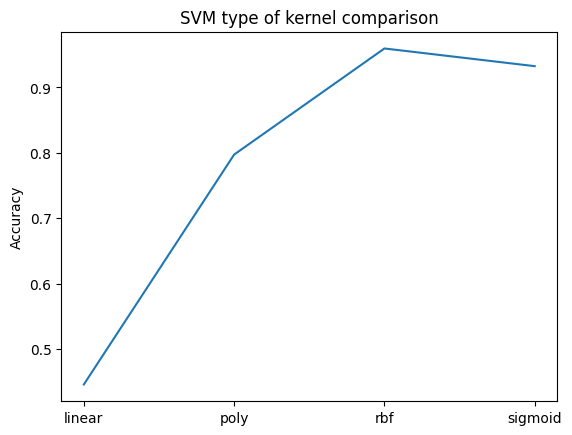

In [8]:
scores = []
kernels =  ['linear', 'poly', 'rbf', 'sigmoid']
for k in kernels:
    score = svm.SVC(kernel=k).fit(X_train, y_train).score(X_test, y_test)
    scores.append(score)

plt.plot(kernels, scores)
plt.title('SVM type of kernel comparison')
plt.ylabel('Accuracy')
plt.show()

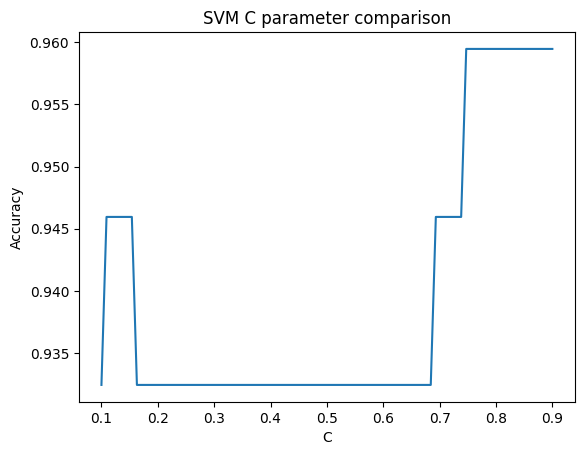

In [9]:
scores = []
Cs = np.linspace(0.1,0.9,9*10)
for c in Cs:
    score = svm.SVC(C=c, kernel='rbf').fit(X_train, y_train).score(X_test, y_test)
    scores.append(score)

plt.plot(Cs, scores)
plt.title('SVM C parameter comparison')
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.show()

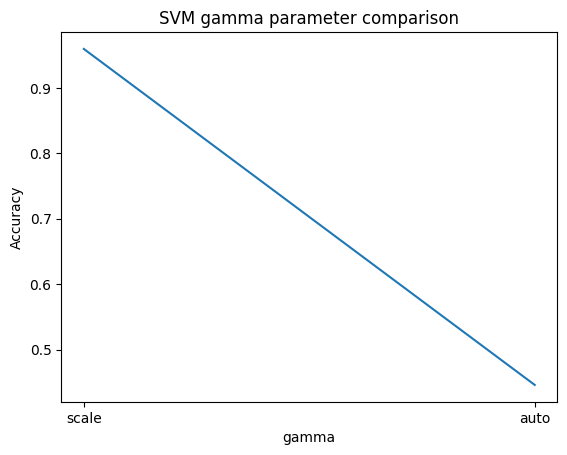

In [10]:
scores = []
gammas = ['scale', 'auto']
for g in gammas:
    score = svm.SVC(C=0.8, kernel='rbf', gamma=g).fit(X_train, y_train).score(X_test, y_test)
    scores.append(score)

plt.plot(gammas, scores)
plt.title('SVM gamma parameter comparison')
plt.ylabel('Accuracy')
plt.xlabel('gamma')
plt.show()

In [21]:
clf = svm.SVC(C=0.75, kernel='rbf', gamma='scale')
scores = cross_val_score(clf, X, y, cv=10)
print(scores.mean(), '+-', scores.std())

0.9698198198198197 +- 0.031191502797776847


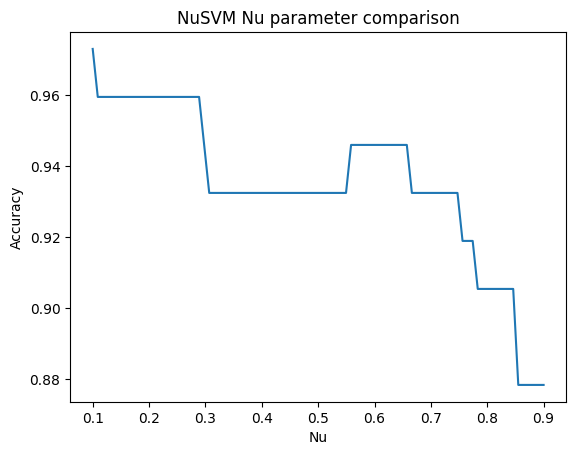

In [18]:
scores = []
nus = np.linspace(0.1,0.9,9*10)
for n in nus:
    score = svm.NuSVC(nu=n, kernel='rbf').fit(X_train, y_train).score(X_test, y_test)
    scores.append(score)

plt.plot(nus, scores)
plt.title('NuSVM Nu parameter comparison')
plt.ylabel('Accuracy')
plt.xlabel('Nu')
plt.show()

In [22]:
clf = svm.NuSVC(nu=0.15, kernel='rbf', gamma='scale')
scores = cross_val_score(clf, X, y, cv=10)
print(scores.mean(), '+-', scores.std())

0.9671171171171171 +- 0.02958910533954067


In [185]:
kf = StratifiedKFold(n_splits=4)

accuracy = []
m = ['precision', 'recall', 'f1-score']
metrics = {'noKC': {'precision': [], 'recall': [], 'f1-score': []},
            'KC': {'precision': [], 'recall': [], 'f1-score': []}}

for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf = svm.SVC(C=0.75, kernel='rbf', gamma='scale')
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    
    report = classification_report(y_test, y_pred, output_dict=True)
    for me in m:
        metrics['noKC'][me].append(report['0'][me])
        metrics['KC'][me].append(report['1'][me])
    accuracy.append(report['accuracy'])

print()
for me in m:
    print(f'{me.upper()} noKC - {round(np.mean(metrics["noKC"][me]),3)} +- {round(np.std(metrics["noKC"][me]),3)}')
    print(f'{me.upper()} KC - {round(np.mean(metrics["KC"][me]),3)} +- {round(np.std(metrics["KC"][me]),3)}')
    print()
print(f"Accuracy: {round(np.mean(accuracy),3)} +- {round(np.std(accuracy),3)}")


PRECISION noKC - 0.962 +- 0.031
PRECISION KC - 0.956 +- 0.001

RECALL noKC - 0.956 +- 0.0
RECALL KC - 0.962 +- 0.032

F1-SCORE noKC - 0.959 +- 0.015
F1-SCORE KC - 0.959 +- 0.017

Accuracy: 0.959 +- 0.016


In [186]:
sh = StratifiedShuffleSplit(n_splits=4, test_size=0.2)

accuracy = []
m = ['precision', 'recall', 'f1-score']
metrics = {'noKC': {'precision': [], 'recall': [], 'f1-score': []},
            'KC': {'precision': [], 'recall': [], 'f1-score': []}}

for i, (train_index, test_index) in enumerate(sh.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf = svm.SVC(C=0.75, kernel='rbf', gamma='scale')
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    
    report = classification_report(y_test, y_pred, output_dict=True)
    for me in m:
        metrics['noKC'][me].append(report['0'][me])
        metrics['KC'][me].append(report['1'][me])
    accuracy.append(report['accuracy'])

print()
for me in m:
    print(f'{me.upper()} noKC - {round(np.mean(metrics["noKC"][me]),3)} +- {round(np.std(metrics["noKC"][me]),3)}')
    print(f'{me.upper()} KC - {round(np.mean(metrics["KC"][me]),3)} +- {round(np.std(metrics["KC"][me]),3)}')
    print()
print(f"Accuracy: {round(np.mean(accuracy),3)} +- {round(np.std(accuracy),3)}")


PRECISION noKC - 0.959 +- 0.014
PRECISION KC - 0.947 +- 0.031

RECALL noKC - 0.946 +- 0.033
RECALL KC - 0.959 +- 0.014

F1-SCORE noKC - 0.952 +- 0.023
F1-SCORE KC - 0.953 +- 0.022

Accuracy: 0.953 +- 0.022


In [187]:
groups = [1]*20 + [2]*14 + [3]*16 + [4]*18 + [5]*12 + [6]*29 + [7]*4 + [8]*9 + [9]*12 + [10]*31 + [11]*18
groups *= 2

gk = GroupKFold(n_splits=4)

accuracy = []
m = ['precision', 'recall', 'f1-score']
metrics = {'noKC': {'precision': [], 'recall': [], 'f1-score': []},
            'KC': {'precision': [], 'recall': [], 'f1-score': []}}

for i, (train_index, test_index) in enumerate(gk.split(X, y, groups=groups)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf = svm.SVC(C=0.75, kernel='rbf', gamma='scale')
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    
    report = classification_report(y_test, y_pred, output_dict=True)
    for me in m:
        metrics['noKC'][me].append(report['0'][me])
        metrics['KC'][me].append(report['1'][me])
    accuracy.append(report['accuracy'])

print()
for me in m:
    print(f'{me.upper()} noKC - {round(np.mean(metrics["noKC"][me]),3)} +- {round(np.std(metrics["noKC"][me]),3)}')
    print(f'{me.upper()} KC - {round(np.mean(metrics["KC"][me]),3)} +- {round(np.std(metrics["KC"][me]),3)}')
    print()
print(f"Accuracy: {round(np.mean(accuracy),3)} +- {round(np.std(accuracy),3)}")


PRECISION noKC - 0.966 +- 0.025
PRECISION KC - 0.961 +- 0.011

RECALL noKC - 0.961 +- 0.01
RECALL KC - 0.966 +- 0.026

F1-SCORE noKC - 0.964 +- 0.017
F1-SCORE KC - 0.964 +- 0.018

Accuracy: 0.964 +- 0.018


In conclusion, as a first approach for this iteration, the best SVM model has C=0.75, its kernel='rbf' anb gamma='scale' with an accuracy bigger than 94%.

# With KC-noKC labeled unbalanced

In [201]:
m = ['precision', 'recall', 'f1-score']
metrics = {'noKC': {'precision': None, 'recall': None, 'f1-score': None},
            'KC': {'precision': None, 'recall': None, 'f1-score': None}}

clf = svm.SVC(C=0.75, kernel='rbf', gamma='scale')
clf.fit(X, y)

y_pred = clf.predict(X)
    
report = classification_report(y, y_pred, output_dict=True)
for me in m:
    metrics['noKC'][me] = report['0'][me]
    metrics['KC'][me] = report['1'][me]
accuracy = report['accuracy']

print()
for me in m:
    print(f'{me.upper()} noKC - {round(metrics["noKC"][me],3)}')
    print(f'{me.upper()} KC - {round(metrics["KC"][me])}')
    print()
print(f"Accuracy: {round(accuracy,3)}")


PRECISION noKC - 0.973
PRECISION KC - 1

RECALL noKC - 0.989
RECALL KC - 1

F1-SCORE noKC - 0.981
F1-SCORE KC - 1

Accuracy: 0.981


In [212]:
import sys
sys.path.append('/home/lsym/Aylin/PhD/KC_detection_algorithm/')

In [214]:
from src.utils.localizator import get_flags

In [219]:
def normalize_zones(lst):
    n = len(lst)
    result = [0] * n
    i = 0
    event_duration=4

    while i < n:
        if lst[i] == 1:
            # Find the end of the current zone
            start = i
            while i < n and (lst[i] == 1 or (i - start) < event_duration):
                i += 1
            end = i
            
            # Check if the zone is less than event_duration long and extend if needed
            if (end - start) < event_duration:
                start = max(start - (event_duration - (end - start)), 0)
                end = start + event_duration
            
            # Fill the result with normalized zone
            for j in range(start, end):
                if j < n:
                    result[j] = 1

        else:
            i += 1

    return result

# Example usage
lst = [0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0]
normalized_lst = normalize_zones(lst)
print(lst)
print(normalized_lst)


[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0]
